#Libraries, Dates and Data

In [1]:
#installing libraries
!pip install yfinance
!pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 430.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [2]:
#import libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Dates
training_start = "2014-01-08"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-02"

In [4]:
#Download VW stock
y = ["VOW.DE"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1wk")
y = y['Adj Close'].rename("y")
y.head(1)

[*********************100%***********************]  1 of 1 completed


Date
2014-01-06    141.461487
Name: y, dtype: float64

In [5]:
#Dowload the control groups
stocks = ["META", "DIS", "NVS", "AMZ"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1wk")
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%***********************]  4 of 4 completed


,AMZ,DIS,META,NVS
Date,,,,
2014-01-06,290.200012,69.382637,57.939999,52.987694
2014-01-13,296.000000,68.084991,56.299999,52.883457
2014-01-20,287.000000,66.925400,54.450001,52.010540
2014-01-27,271.299988,66.824158,62.570000,51.508930
2014-02-03,260.450012,69.640335,64.320000,52.714088


In [6]:
#Combine everything
X.index = X.index.tz_localize(None)
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,y,AMZ,DIS,META,NVS
Date,,,,,
2014-01-06,141.461487,290.200012,69.382637,57.939999,52.987694
2014-01-13,143.239731,296.000000,68.084991,56.299999,52.883457
2014-01-20,134.275894,287.000000,66.925400,54.450001,52.010540
2014-01-27,130.900879,271.299988,66.824158,62.570000,51.508930
2014-02-03,132.461365,260.450012,69.640335,64.320000,52.714088


#Correlation Matrix

In [7]:
#Subset the training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,AMZ,DIS,META,NVS
Date,,,,,
2015-07-13,153.613373,445.350006,111.423409,94.970001,73.266472
2015-07-27,139.479736,484.250000,112.492081,94.010002,71.840057
2015-08-10,136.410492,478.299988,100.455437,94.419998,70.960670
2015-08-17,125.042946,445.049988,92.655975,86.059998,67.553886
2015-08-24,129.211044,465.399994,96.068245,91.010002,68.100922


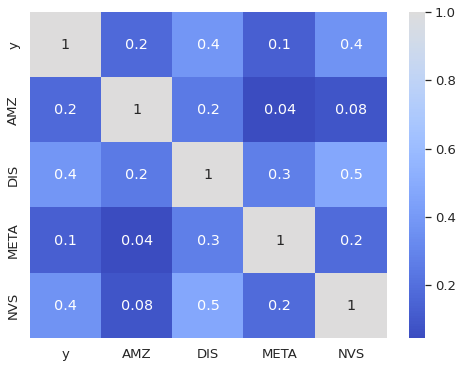

In [8]:
#Heatmap
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm',
            center = True)

In [9]:
#Preparing final df
df_final = df.drop(columns = ["META", "AMZ"])
df_final.head(0)

,y,DIS,NVS
Date,,,


#Google Causal Impact

In [10]:
#Get first and last date
print(df_final.head(1))
print(df_final.tail(10))

                     y        DIS        NVS
Date                                        
2014-01-06  141.461487  69.382637  52.987694
                     y         DIS        NVS
Date                                         
2015-07-13  153.613373  111.423409  73.266472
2015-07-27  139.479736  112.492081  71.840057
2015-08-10  136.410492  100.455437  70.960670
2015-08-17  125.042946   92.655975  67.553886
2015-08-24  129.211044   96.068245  68.100922
2015-08-31  121.215874   94.652702  65.469666
2015-09-07  125.990242   97.943115  66.854530
2015-09-14  122.276863   96.405708  66.923767
2015-09-21   87.567970   94.024628  63.226166
2015-09-28   76.655136   96.555702  64.583351


In [11]:
#Dates
training_start = "2014-01-06"
training_end = "2015-08-31"
treatment_start = "2015-09-07"
treatment_end = "2015-09-28"
end_stock = "2015-10-02"

In [12]:
#Define Pre and Post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [ ]:
#CI
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


In [ ]:
#Output
impact.plot()

In [ ]:
#summary
print(impact.summary())